<a href="https://colab.research.google.com/github/Anupama-Rajput/Sentiment_Analysis_based_on_Review_Classification/blob/main/History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the dependencies

In [5]:
import numpy as np
import pandas as pd

In [6]:
import re
import string
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


###Importing the dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
dataset = pd.read_csv('./drive/MyDrive/PGDDA/a1_Restaurant_Review_History.tsv', delimiter = '\t', quoting = 3)

In [9]:
#Checking the number of rows and coloumns in dataset
dataset.shape

(900, 2)

In [10]:
#displaying the first 5 rows of the dataset
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
#dispalying last 5 rows of the dataset
dataset.tail()

,Review,Liked
895,I want to first say our server was great and w...,1
896,The pizza selections are good.,1
897,"I had strawberry tea, which was good.",1
898,Highly unprofessional and rude to a loyal patron!,0
899,"Overall, a great experience.",1


In [16]:
#checking for missing values
dataset.isnull().sum()


Review    0
Liked     0
dtype: int64

In [13]:
dataset.describe()

,Liked
count,900.000000
mean,0.551111
std,0.497657
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [14]:
#checking the distribution of target Variable
dataset['Liked'].value_counts()


1    496
0    404
Name: Liked, dtype: int64

([<matplotlib.patches.Wedge at 0x7dfbd6b63370>,
 [Text(-0.2638039136035735, 1.6287748448350494, 'Positive Reviews'),
  Text(0.2638039136035733, -1.6287748448350494, 'Negative Reviews')],
 [Text(-0.14389304378376735, 0.8884226426372995, '55.1%'),
  Text(0.14389304378376722, -0.8884226426372995, '44.9%')])

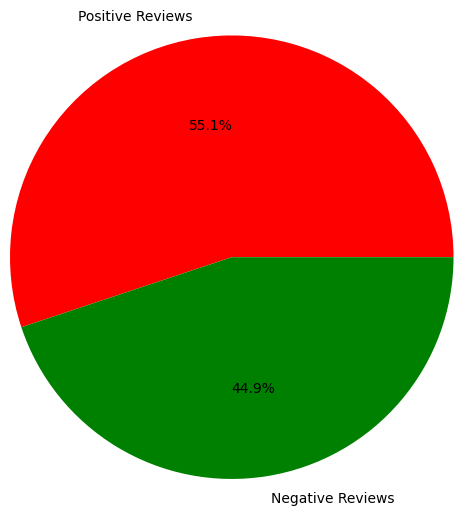

In [15]:
plt.pie(dataset['Liked'].value_counts(), labels=['Positive Reviews','Negative Reviews'], colors=['red','green'], autopct='%1.1f%%', radius=1.5)

###Data Cleaning

In [17]:
#dropping the Special Characters


import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
corpus=[]

for i in range(0, 900):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [19]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [21]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [22]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = './drive/MyDrive/PGDDA/c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

###Checking for the distribution

<Axes: xlabel='Liked', ylabel='count'>

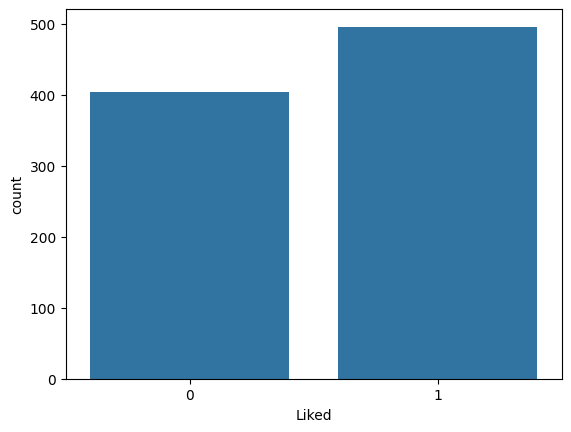

In [23]:
sns.countplot(x="Liked",data=dataset)

###Finding the rare words

In [24]:
rare_words = pd.Series(" ".join(dataset["Review"]).split()).value_counts()
rare_words

the           357
and           347
was           257
I             251
a             200
             ... 
fish,           1
incredibly      1
location.       1
convenient      1
patron!         1
Length: 2756, dtype: int64

###Word Cloud

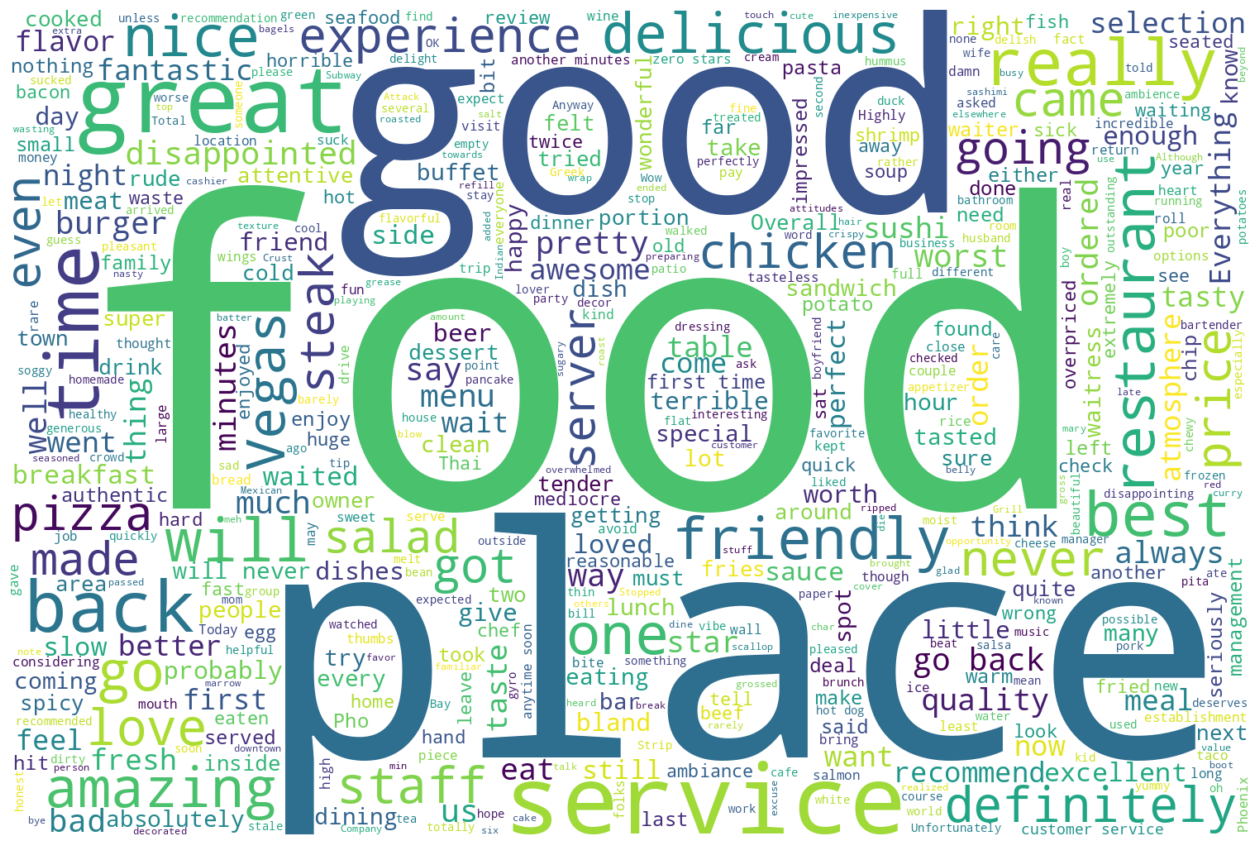

In [25]:
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color="white",max_words=500, width=1500, height=1000).generate(' '.join(dataset['Review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###Dividing dataset into training  and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Model fitting (Naive Bayes)


In [27]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [28]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, './drive/MyDrive/PGDDA/c2_Classifier_Sentiment_Model')

['./drive/MyDrive/PGDDA/c2_Classifier_Sentiment_Model']

###Model performance

In [29]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[67 11]
 [38 64]]


0.7277777777777777

###Model Fitting(KNN)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn_model = knn.fit(X_train, y_train)

In [33]:
knn_pred = knn_model.predict(X_test)


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
knnm = confusion_matrix(knn_pred, y_pred)
print(knnm)

accuracy_score(knn_pred, y_pred)

[[69 32]
 [36 43]]


0.6222222222222222

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(knn_pred, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       101
           1       0.57      0.54      0.56        79

    accuracy                           0.62       180
   macro avg       0.62      0.61      0.61       180
weighted avg       0.62      0.62      0.62       180



###Model Fitting(SVM)

In [36]:
from sklearn.svm import SVC

In [37]:
svc_model = SVC().fit(X_train, y_train)

In [38]:
svc_pred = svc_model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
knnm = confusion_matrix(svc_pred, y_pred)
print(knnm)

accuracy_score(svc_pred, y_pred)


[[64  9]
 [41 66]]


0.7222222222222222

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(svc_pred, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.88      0.72        73
           1       0.88      0.62      0.73       107

    accuracy                           0.72       180
   macro avg       0.74      0.75      0.72       180
weighted avg       0.77      0.72      0.72       180



###Comparison among three algorithms


In [41]:
pred_dataset = pd.DataFrame({"NB":[accuracy_score(y_test, y_pred)],
                             "KNN": [accuracy_score(knn_pred, y_pred)],
                             "SVC": [accuracy_score(svc_pred, y_pred)]})

<Axes: >

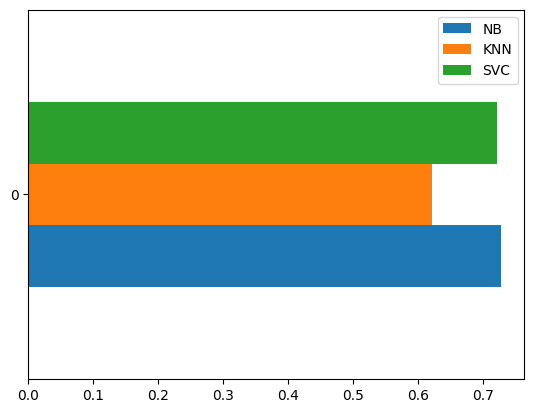

In [42]:
pred_dataset.plot(kind="barh")